In [2]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filepath=os.listdir('drive/MyDrive/MFCC')
for sub in filepath:
  print(sub)

Person 9
Person 8
Person 7
Person 6
Person 5
Person 4
Person 3
Person 10
Person 1
Person 2


In [4]:
train_dir='drive/MyDrive/MFCC'
training_data=[]


In [5]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [6]:
create_trainingdata()

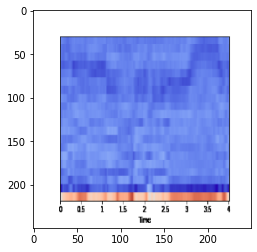

In [7]:
plt.imshow(training_data[1][0])

In [8]:
random.shuffle(training_data)

In [9]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [11]:
x_train.shape

(5625, 250, 250, 3)

In [12]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2), 

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [13]:
model1=cnn.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
176/176 [==============================] - 40s 199ms/step - loss: 2.5765 - accuracy: 0.2580 - val_loss: 1.3436 - val_accuracy: 0.5168
Epoch 2/50
176/176 [==============================] - 32s 183ms/step - loss: 1.0410 - accuracy: 0.6368 - val_loss: 0.4986 - val_accuracy: 0.8741
Epoch 3/50
176/176 [==============================] - 32s 184ms/step - loss: 0.5144 - accuracy: 0.8478 - val_loss: 0.3348 - val_accuracy: 0.8875
Epoch 4/50
176/176 [==============================] - 33s 185ms/step - loss: 0.3048 - accuracy: 0.9058 - val_loss: 0.1504 - val_accuracy: 0.9605
Epoch 5/50
176/176 [==============================] - 32s 184ms/step - loss: 0.2058 - accuracy: 0.9371 - val_loss: 0.1757 - val_accuracy: 0.9547
Epoch 6/50
176/176 [==============================] - 32s 184ms/step - loss: 0.1897 - accuracy: 0.9412 - val_loss: 0.1862 - val_accuracy: 0.9552
Epoch 7/50
176/176 [==============================] - 32s 184ms/step - loss: 0.1574 - accuracy: 0.9532 - val_loss: 0.1011 - val_ac

In [14]:
cnn.save("CNNMFCC.h5")

In [15]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

59/59 [==============================] - 4s 66ms/step - loss: 0.0413 - accuracy: 0.9893


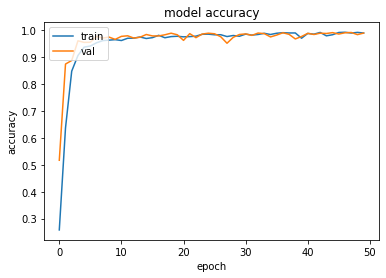

In [16]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

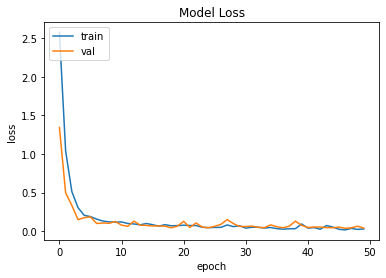

In [17]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(training_data[100][1])

2


In [ ]:
prediction_data=training_data[100][0].reshape(-1,250,250,3)
prediction=cnn.predict(prediction_data)

In [ ]:
print(prediction)

[[1.4248703e-32 1.3326972e-03 9.9866736e-01 8.9139129e-13 3.3612439e-25]]


In [ ]:
prob=np.array(prediction)
labels = np.argmax(prob, axis=-1)    
print(labels)

[2]


In [19]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:50],axis=1)
actual=y_test[:50].reshape(-1)

print("Predction:")
print(model_pred)
print("Actual:")
print(actual)

Predction:
[1 7 8 2 1 9 7 2 9 5 4 9 7 3 0 7 6 8 2 1 2 7 6 9 4 1 0 3 3 4 5 3 9 3 4 6 1
 3 6 9 1 3 1 3 8 0 3 2 7 7]
Actual:
[1 7 8 2 1 9 7 2 9 5 4 9 7 3 0 7 6 8 2 1 2 7 6 9 4 1 0 3 3 4 5 3 9 3 4 6 1
 3 6 9 1 3 1 3 8 0 3 2 7 7]
